In [101]:
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [102]:
from keras.datasets import mnist
 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [103]:
print("Train images: ", train_images.shape)
print("Train labels: ", train_labels.size)
print("Test images: ", test_images.shape)
print("Test labels: ", test_labels.size)

Train images:  (60000, 28, 28)
Train labels:  60000
Test images:  (10000, 28, 28)
Test labels:  10000


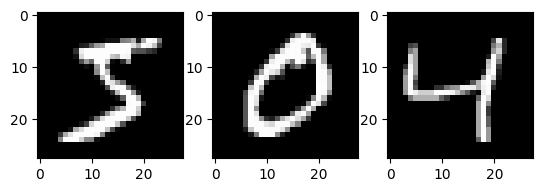

In [104]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(train_images[1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(train_images[2], cmap='gray')

In [105]:
#Network architecture
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [106]:
#Network training
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [107]:
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype(np.float32)
train_images = train_images/255

test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype(np.float32)
test_images = test_images/255

In [108]:
np.max(train_images)

1.0

In [109]:
#to_categorical converts a class vector (integers) to binary class matrix
a = keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
print(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [110]:
from keras.utils import to_categorical
 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [111]:
network.fit(train_images, train_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8695 - loss: 0.4507
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9673 - loss: 0.1124
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9783 - loss: 0.0704
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9850 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9893 - loss: 0.0356


In [112]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
 
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0753
test_acc: 0.9804999828338623
